In [32]:
import skxray.core.speckle as speckle
import skxray.core.roi as roi
import skxray.core.utils as utils

import xray_vision.mpl_plotting as mpl_plot
import xray_vision.mpl_plotting.speckle as speckle_plot

import numpy as np
import os, sys

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.axes_grid import ImageGrid

# Easily switch between interactive and static matplotlib plots
interactive_mode = True

if interactive_mode:
    %matplotlib notebook
else:
    %matplotlib inline

#backend = mpl.get_backend()
cmap = "Dark2"

## Data Directory

In [33]:
data_dir = "/Volumes/Data/BeamLines/CSX_Data/X_data/"

X_data = np.load(data_dir+"TbCO_speckle_visibility.npy")
X_data.shape

(230, 230)

### mask 

<IPython.core.display.Javascript object>


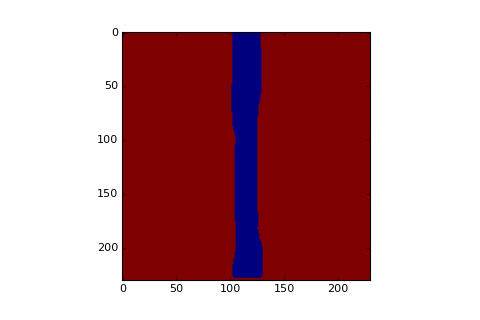

In [34]:
mask = ~np.load(data_dir+"Tbco_mask.npy")
plt.figure()
plt.imshow(mask)
plt.show()

<IPython.core.display.Javascript object>


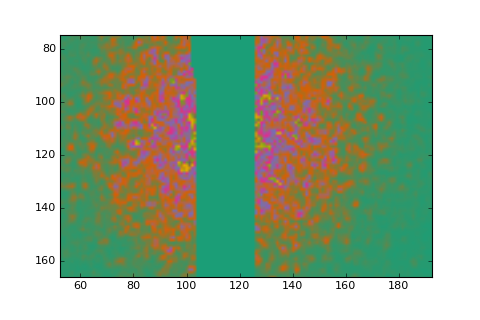

In [35]:
plt.figure()
plt.imshow(X_data*mask, cmap=cmap)
plt.show()

In [46]:
inner_radius = 20
width = 1
spacing = 2
num_rings = 3

#  create edges of the rings using roi.ring_edges
edges = roi.ring_edges(inner_radius, width, spacing, num_rings)
edges

array([[ 20.,  21.],
       [ 23.,  24.],
       [ 26.,  27.]])

<IPython.core.display.Javascript object>


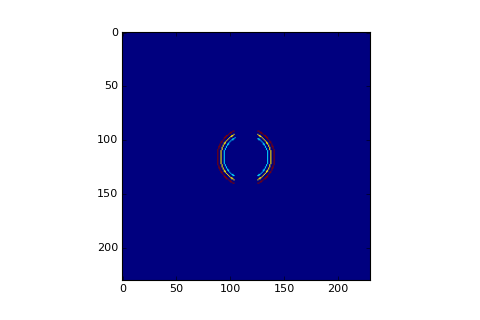

In [48]:
center = (116, 114)
rings = roi.rings(edges, center, X_data.shape)

rings_mask = rings*mask

plt.figure()
plt.imshow(rings_mask)
plt.show()


<IPython.core.display.Javascript object>


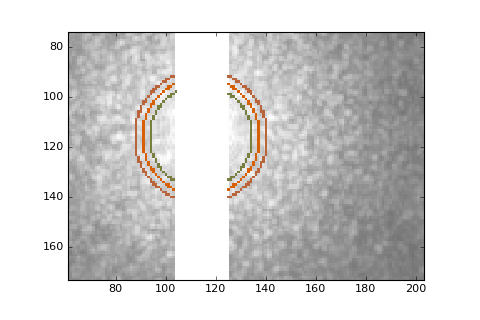

In [49]:
fig, ax = plt.subplots()
im, im_lbel = mpl_plot.roi.show_label_array_on_image(ax, X_data, rings_mask, cmap='Dark2')
plt.show()

In [ ]:
#  get the max_cts or brightest pixel in the image

In [51]:
# this is before dividing by 36
max_cts = roi.roi_max_counts(X_data, rings_mask)
max_cts

6639.0165426329177

In [52]:
max_cts = roi.roi_max_counts(X_data/36, rings_mask)
max_cts

184.41712618424771

In [57]:
p_k, std_dev = speckle.xsvs((X_data1, ), rings_mask, timebin_num=2,
                             number_of_img=4, max_cts=max_cts)

In [56]:
X_data1 = X_data.reshape(1, 230, 230)

In [59]:
p_k.shape

(2, 3)

<IPython.core.display.Javascript object>


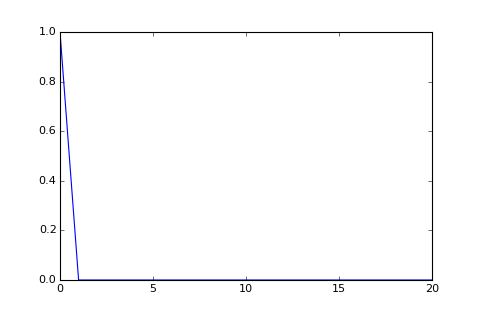

In [68]:
plt.figure()
plt.plot(p_k[0,0])
plt.xlim(0,20)
plt.show()